In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom

In [26]:
X , y = make_classification(
    n_samples = 1000,
    n_features = 8,
    n_informative = 4,
    n_redundant = 4,
    random_state = 42,
    weights = [0.97,0.3]
)

In [27]:
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)
X_norm

array([[0.6434682 , 0.6178125 , 0.42152413, ..., 0.40941227, 0.59451553,
        0.42157602],
       [0.51075964, 0.3520013 , 0.47552317, ..., 0.63673341, 0.60612267,
        0.60013941],
       [0.29907884, 0.55631269, 0.60257448, ..., 0.74214048, 0.5985457 ,
        0.78584305],
       ...,
       [0.55116595, 0.33541385, 0.25713102, ..., 0.5312495 , 0.3559816 ,
        0.57720486],
       [0.56625988, 0.24221329, 0.13645435, ..., 0.46308861, 0.29312356,
        0.63227959],
       [0.40775195, 0.44629797, 0.44670191, ..., 0.75498334, 0.35091604,
        0.60682352]], shape=(1000, 8))

In [28]:
grid_size = 10
lr = 0.3
sigma = 1.0
n_iter = 1000

som_default = MiniSom(x=grid_size,y=grid_size,input_len = X_norm.shape[1], sigma = sigma, learning_rate = lr,random_seed = 42)

som_default.random_weights_init(X_norm)

som_default.train_random(X_norm,n_iter)

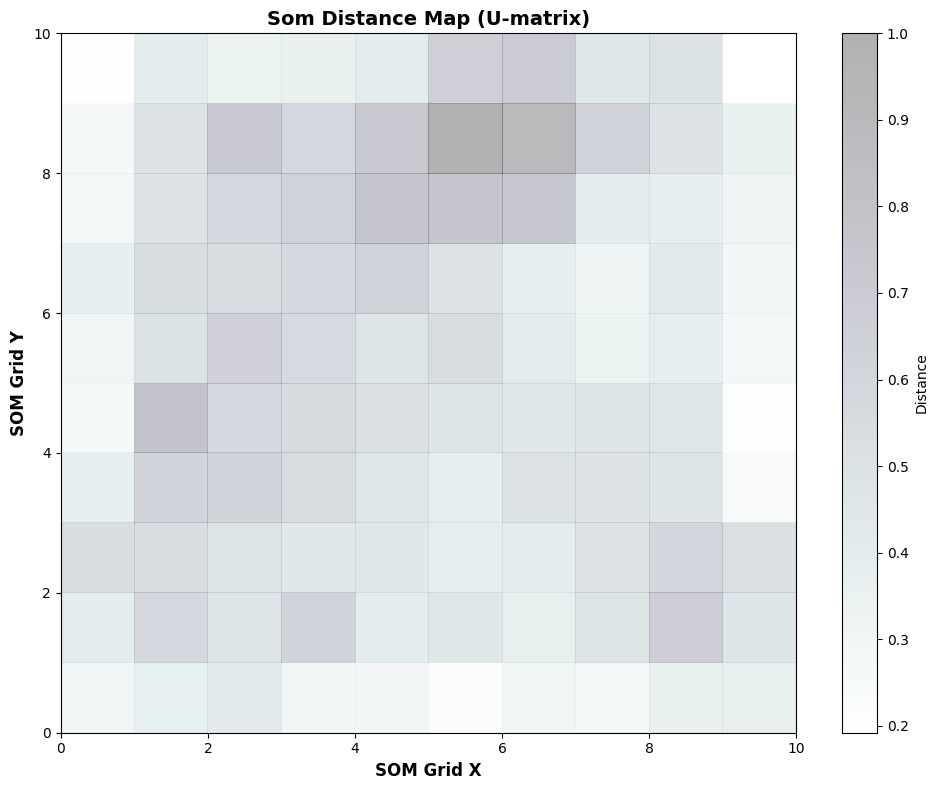

In [29]:
dist_map = som_default.distance_map()

plt.figure(figsize=(10,8))
plt.pcolor(dist_map.T,cmap='bone_r',alpha=0.3)
plt.colorbar(label='Distance')
plt.title('Som Distance Map (U-matrix)',fontsize=14,fontweight='bold')
plt.xlabel('SOM Grid X',fontsize=12,fontweight='bold')
plt.ylabel('SOM Grid Y',fontsize=12,fontweight='bold')
plt.tight_layout()
plt.show()

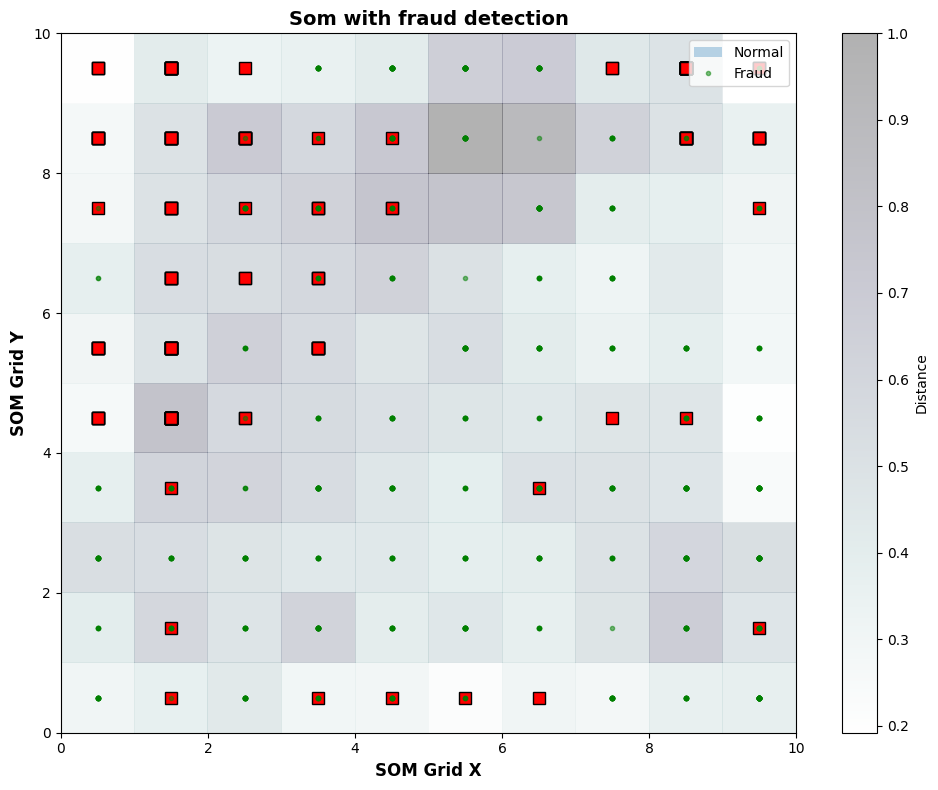

In [30]:
dist_map = som_default.distance_map()

plt.figure(figsize=(10,8))
plt.pcolor(dist_map.T,cmap='bone_r',alpha=0.3)
plt.colorbar(label='Distance')
for i,x in enumerate(X_norm):
    w = som_default.winner(x)
    if y[i] == 0:
        plt.plot(w[0] + 0.5,w[1] + 0.5,'go',markersize=3,alpha=0.5)
    else:
        plt.plot(w[0] + 0.5,w[1] + 0.5,'rs',markersize=8,markeredgecolor='black')

plt.title('Som with fraud detection',fontsize=14,fontweight='bold')
plt.xlabel('SOM Grid X',fontsize=12,fontweight='bold')
plt.ylabel('SOM Grid Y',fontsize=12,fontweight='bold')
plt.legend(['Normal', 'Fraud'], loc='upper right')
plt.tight_layout()
plt.show()